In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('ntcprice.csv', date_parser = True)

In [3]:
df.head(10)

,SN,Date,No. of Transaction,Max Price,Min Price,Closing Price,Traded Shares,Total Amount,Prev. Closing,Difference(Rs),% Change
0,1,2020-01-01,37,623.0,612.0,619.0,6310,3886900,623.0,-4.0,-0.64
1,2,2019-12-31,39,649.0,620.0,623.0,3034,1896758,662.0,-39.0,-5.89
2,3,2019-12-30,134,662.0,655.0,662.0,28830,19005838,659.0,3.0,0.46
3,4,2019-12-29,47,664.0,658.0,659.0,6455,4254337,657.0,2.0,0.30
4,5,2019-12-26,45,668.0,654.0,657.0,3815,2506070,657.0,0.0,0.00
5,6,2019-12-25,48,660.0,650.0,657.0,7225,4735546,653.0,4.0,0.61
6,7,2019-12-24,166,670.0,650.0,653.0,15459,10112842,659.0,-6.0,-0.91
7,8,2019-12-23,38,659.0,637.0,659.0,5000,3210900,641.0,18.0,2.81
8,9,2019-12-22,20,643.0,635.0,641.0,2262,1443946,636.0,5.0,0.79
9,10,2019-12-19,31,652.0,632.0,636.0,1808,1152456,643.0,-7.0,-1.09


In [4]:
df.tail(10)

,SN,Date,No. of Transaction,Max Price,Min Price,Closing Price,Traded Shares,Total Amount,Prev. Closing,Difference(Rs),% Change
2190,2191,2010-04-27,11,448.0,433.0,445.0,3030,1335440,445.0,0.0,0.00
2191,2192,2010-04-26,3,448.0,441.0,445.0,1200,534700,455.0,-10.0,-2.20
2192,2193,2010-04-25,10,455.0,440.0,455.0,2310,1035190,440.0,15.0,3.41
2193,2194,2010-04-22,5,440.0,433.0,440.0,1250,542850,443.0,-3.0,-0.68
2194,2195,2010-04-21,10,444.0,438.0,443.0,2000,882540,444.0,-1.0,-0.23
2195,2196,2010-04-20,7,445.0,440.0,444.0,3870,1708480,441.0,3.0,0.68
2196,2197,2010-04-19,3,445.0,441.0,441.0,400,177500,442.0,-1.0,-0.23
2197,2198,2010-04-15,13,455.0,422.0,455.0,3300,1464600,414.0,41.0,9.90
2198,2199,2010-04-15,13,455.0,422.0,455.0,3300,1464600,414.0,41.0,9.90
2199,2200,2010-04-15,13,455.0,422.0,455.0,3300,1464600,414.0,41.0,9.90


In [5]:
df.shape

(2200, 11)

In [6]:
data_training = df[df['Date']<'2019-01-01'].copy()
data_test = df[df['Date']>='2019-01-01'].copy()

In [7]:
data_training.head()

,SN,Date,No. of Transaction,Max Price,Min Price,Closing Price,Traded Shares,Total Amount,Prev. Closing,Difference(Rs),% Change
243,244,2018-12-31,15,743.0,731.0,734.0,3110,2286790,743.0,-9.0,-1.21
244,245,2018-12-30,67,797.0,743.0,743.0,18455,13756150,797.0,-54.0,-6.78
245,246,2018-12-27,135,804.0,790.0,797.0,23618,18746584,792.0,5.0,0.63
246,247,2018-12-26,56,792.0,785.0,792.0,13328,10515076,785.0,7.0,0.89
247,248,2018-12-25,31,790.0,780.0,785.0,7800,6108265,790.0,-5.0,-0.63


In [8]:
data_test.head()

,SN,Date,No. of Transaction,Max Price,Min Price,Closing Price,Traded Shares,Total Amount,Prev. Closing,Difference(Rs),% Change
0,1,2020-01-01,37,623.0,612.0,619.0,6310,3886900,623.0,-4.0,-0.64
1,2,2019-12-31,39,649.0,620.0,623.0,3034,1896758,662.0,-39.0,-5.89
2,3,2019-12-30,134,662.0,655.0,662.0,28830,19005838,659.0,3.0,0.46
3,4,2019-12-29,47,664.0,658.0,659.0,6455,4254337,657.0,2.0,0.30
4,5,2019-12-26,45,668.0,654.0,657.0,3815,2506070,657.0,0.0,0.00


In [9]:
df_train = data_training.drop(['Date'], axis = 1)


In [10]:
df_train.head()

,SN,No. of Transaction,Max Price,Min Price,Closing Price,Traded Shares,Total Amount,Prev. Closing,Difference(Rs),% Change
243,244,15,743.0,731.0,734.0,3110,2286790,743.0,-9.0,-1.21
244,245,67,797.0,743.0,743.0,18455,13756150,797.0,-54.0,-6.78
245,246,135,804.0,790.0,797.0,23618,18746584,792.0,5.0,0.63
246,247,56,792.0,785.0,792.0,13328,10515076,785.0,7.0,0.89
247,248,31,790.0,780.0,785.0,7800,6108265,790.0,-5.0,-0.63


In [11]:
df_train.shape

(1957, 10)

In [12]:
data_test.shape

(243, 11)

In [13]:
scaler = MinMaxScaler()
df_train1 = scaler.fit_transform(df_train)
df_train1

array([[0.00000000e+00, 3.18181818e-02, 6.36521739e-01, ...,
        6.56794425e-01, 5.00000000e-01, 4.38938939e-01],
       [5.11247444e-04, 1.50000000e-01, 7.30434783e-01, ...,
        7.50871080e-01, 9.82142857e-02, 1.60160160e-01],
       [1.02249489e-03, 3.04545455e-01, 7.42608696e-01, ...,
        7.42160279e-01, 6.25000000e-01, 5.31031031e-01],
       ...,
       [9.98977505e-01, 2.72727273e-02, 1.35652174e-01, ...,
        8.36236934e-02, 9.46428571e-01, 9.94994995e-01],
       [9.99488753e-01, 2.72727273e-02, 1.35652174e-01, ...,
        8.36236934e-02, 9.46428571e-01, 9.94994995e-01],
       [1.00000000e+00, 2.72727273e-02, 1.35652174e-01, ...,
        8.36236934e-02, 9.46428571e-01, 9.94994995e-01]])

In [14]:
X_train = []
y_train = []

for i in range(60, df_train1.shape[0]):
    X_train.append(df_train1[i-60:i])
    y_train.append(df_train1[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)


In [15]:
X_train.shape


(1897, 60, 10)

## Building LTSM

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [17]:
regressor =Sequential()


In [18]:
X_train.shape


(1897, 60, 10)

In [19]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (60, 10)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units =50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [20]:
regressor.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            12200     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [21]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
60/60 [==============================] - 9s 69ms/step - loss: 0.0238
Epoch 2/100
60/60 [==============================] - 5s 82ms/step - loss: 0.0057
Epoch 3/100
60/60 [==============================] - 4s 61ms/step - loss: 0.0044
Epoch 4/100
60/60 [==============================] - 4s 63ms/step - loss: 0.0037
Epoch 5/100
60/60 [==============================] - 4s 64ms/step - loss: 0.0029
Epoch 6/100
60/60 [==============================] - 5s 78ms/step - loss: 0.0028
Epoch 7/100
60/60 [==============================] - 5s 79ms/step - loss: 0.0025
Epoch 8/100
60/60 [==============================] - 5s 76ms/step - loss: 0.0025
Epoch 9/100
60/60 [==============================] - 4s 75ms/step - loss: 0.0023
Epoch 10/100
60/60 [==============================] - 4s 74ms/step - loss: 0.0021
Epoch 11/100
60/60 [==============================] - 5s 76ms/step - loss: 0.0024
Epoch 12/100
60/60 [==============================] - 4s 75ms/step - loss: 0.0019
Epoch 13/100
60/60 [=====

60/60 [==============================] - 5s 76ms/step - loss: 7.0461e-04
Epoch 99/100
60/60 [==============================] - 5s 78ms/step - loss: 6.3925e-04
Epoch 100/100
60/60 [==============================] - 5s 83ms/step - loss: 8.2948e-04


# prepare test dataset

In [22]:
data_test.head()


,SN,Date,No. of Transaction,Max Price,Min Price,Closing Price,Traded Shares,Total Amount,Prev. Closing,Difference(Rs),% Change
0,1,2020-01-01,37,623.0,612.0,619.0,6310,3886900,623.0,-4.0,-0.64
1,2,2019-12-31,39,649.0,620.0,623.0,3034,1896758,662.0,-39.0,-5.89
2,3,2019-12-30,134,662.0,655.0,662.0,28830,19005838,659.0,3.0,0.46
3,4,2019-12-29,47,664.0,658.0,659.0,6455,4254337,657.0,2.0,0.30
4,5,2019-12-26,45,668.0,654.0,657.0,3815,2506070,657.0,0.0,0.00


In [23]:
past_60_days = data_training.tail(60)


In [26]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date'], axis = 1)
df.head()

,SN,No. of Transaction,Max Price,Min Price,Closing Price,Traded Shares,Total Amount,Prev. Closing,Difference(Rs),% Change
0,2141,3,458.0,451.0,458.0,600,273400,460.0,-2.0,-0.43
1,2142,2,460.0,451.0,460.0,400,181300,458.0,2.0,0.44
2,2143,2,458.0,458.0,458.0,360,164880,456.0,2.0,0.44
3,2144,2,456.0,456.0,456.0,1000,456000,456.0,0.0,0.00
4,2145,3,456.0,450.0,456.0,700,315800,450.0,6.0,1.33


In [27]:
df.shape

(303, 10)

In [28]:
inputs = scaler.transform(df)
inputs

array([[ 9.69836401e-01,  4.54545455e-03,  1.40869565e-01, ...,
         1.63763066e-01,  5.62500000e-01,  4.77977978e-01],
       [ 9.70347648e-01,  2.27272727e-03,  1.44347826e-01, ...,
         1.60278746e-01,  5.98214286e-01,  5.21521522e-01],
       [ 9.70858896e-01,  2.27272727e-03,  1.40869565e-01, ...,
         1.56794425e-01,  5.98214286e-01,  5.21521522e-01],
       ...,
       [-1.53374233e-03,  4.54545455e-02,  6.31304348e-01, ...,
         6.34146341e-01,  5.89285714e-01,  5.06506507e-01],
       [-1.02249489e-03,  1.59090909e-02,  6.36521739e-01, ...,
         6.41114983e-01,  5.44642857e-01,  4.72472472e-01],
       [-5.11247444e-04,  1.59090909e-02,  6.45217391e-01, ...,
         6.41114983e-01,  5.80357143e-01,  4.99499499e-01]])

In [29]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((243, 60, 10), (243,))

In [30]:
y_pred = regressor.predict(X_test)


In [31]:
scaler.scale_


array([5.11247444e-04, 2.27272727e-03, 1.73913043e-03, 1.77619893e-03,
       1.06382979e-03, 7.33084085e-06, 9.70454710e-09, 1.74216028e-03,
       8.92857143e-03, 5.00500501e-02])

In [32]:
scale = 1/5.11247444e-04
scale

1955.999999092416

In [33]:
y_pred = y_pred*scale
y_test = y_test*scale

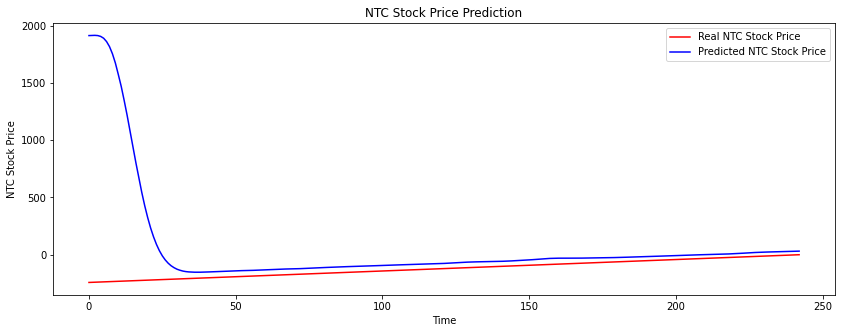

In [34]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real NTC Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted NTC Stock Price')
plt.title('NTC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NTC Stock Price')
plt.legend()
plt.show()